## 웹 주문수 분석

### 비즈니스 현상 데이터 분석
- 쇼핑몰 사이트의 상품 주문 수 추세를 분석

#### 쇼핑몰 사이트
- 주요 품목 - 컴퓨터

#### 001. 데이터 로드

In [1]:
import pandas as pd

In [2]:
customer_master = pd.read_csv('../../data/customer_master.csv', encoding='utf-8')
customer_master.tail()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
4995,AS677229,정우석,2019-07-31 16:52,hirayama_risa@example.com,F,77,1941-10-17,대전광역시
4996,HD758694,정영훈,2019-07-31 19:09,nakahara_mahiru@example.com,F,27,1991-11-13,광주광역시
4997,PL538517,정준기,2019-07-31 19:30,tabata_yuu1@example.com,F,73,1945-12-28,대전광역시
4998,OA955088,정도형,2019-07-31 22:32,setouchi_hikaru@example.com,F,75,1944-04-09,부산광역시
4999,HI349563,정지석,2019-07-31 22:49,horii_kanji@example.com,M,21,1998-02-06,서울특별시


In [3]:
item_master = pd.read_csv('../../data/item_master.csv', encoding='utf-8')
item_master.tail()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [4]:
transaction_1 = pd.read_csv('../../data/transaction_1.csv', encoding='utf-8')
transaction_1.tail()

,transaction_id,price,payment_date,customer_id
4995,T0000005108,210000,2019-06-15 02:42:41,HD315748
4996,T0000005109,150000,2019-06-15 03:36:16,HI215420
4997,T0000005110,50000,2019-06-15 03:44:06,IK880102
4998,T0000005111,210000,2019-06-15 04:14:06,IK074758
4999,T0000005112,50000,2019-06-15 04:42:38,HD444151


In [7]:
transaction_1.shape

(5000, 4)

In [5]:
transaction_detail_1 = pd.read_csv('../../data/transaction_detail_1.csv', encoding='utf-8')
transaction_detail_1.tail()

,detail_id,transaction_id,item_id,quantity
4995,4995,T0000004865,S003,1
4996,4996,T0000004866,S001,3
4997,4997,T0000004867,S001,3
4998,4998,T0000004868,S005,1
4999,4999,T0000004869,S003,1


#### 002. 데이터 결합

##### 트랜잭션 결합

In [6]:
transaction_2 = pd.read_csv('../../data/transaction_2.csv')
transaction_2.tail()

,transaction_id,price,payment_date,customer_id
1781,T0000006894,180000,2019-07-31 21:20:44,HI400734
1782,T0000006895,85000,2019-07-31 21:52:48,AS339451
1783,T0000006896,100000,2019-07-31 23:35:25,OA027325
1784,T0000006897,85000,2019-07-31 23:39:35,TS624738
1785,T0000006898,85000,2019-07-31 23:41:38,AS834214


In [8]:
transaction_2.shape

(1786, 4)

In [9]:
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction.tail()

,transaction_id,price,payment_date,customer_id
6781,T0000006894,180000,2019-07-31 21:20:44,HI400734
6782,T0000006895,85000,2019-07-31 21:52:48,AS339451
6783,T0000006896,100000,2019-07-31 23:35:25,OA027325
6784,T0000006897,85000,2019-07-31 23:39:35,TS624738
6785,T0000006898,85000,2019-07-31 23:41:38,AS834214


In [10]:
transaction.shape

(6786, 4)

##### 트랜잭션 상세 결합

In [11]:
transaction_detail_2 = pd.read_csv('../../data/transaction_detail_2.csv', encoding='utf-8')
transaction_detail_2.tail()

,detail_id,transaction_id,item_id,quantity
2139,7139,T0000006894,S004,1
2140,7140,T0000006895,S002,1
2141,7141,T0000006896,S001,2
2142,7142,T0000006897,S002,1
2143,7143,T0000006898,S002,1


In [12]:
print(transaction_detail_1.shape, transaction_detail_2.shape)

(5000, 4) (2144, 4)


In [13]:
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail.tail()

,detail_id,transaction_id,item_id,quantity
7139,7139,T0000006894,S004,1
7140,7140,T0000006895,S002,1
7141,7141,T0000006896,S001,2
7142,7142,T0000006897,S002,1
7143,7143,T0000006898,S002,1


In [14]:
transaction_detail.shape

(7144, 4)

#### 003. 매출 데이터 조인

In [15]:
join_data = pd.merge(transaction_detail, transaction[['transaction_id', 'payment_date', 'customer_id']], on='transaction_id', how='left')
join_data.tail()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738
7143,7143,T0000006898,S002,1,2019-07-31 23:41:38,AS834214


In [16]:
join_data.shape

(7144, 6)

#### 004. 마스터데이터 조인

In [17]:
join_data = pd.merge(join_data, customer_master, on='customer_id', how='left')
join_data = pd.merge(join_data, item_master, on='item_id', how='left')
join_data.tail()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시,PC-D,180000
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시,PC-B,85000
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시,PC-A,50000
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시,PC-B,85000
7143,7143,T0000006898,S002,1,2019-07-31 23:41:38,AS834214,이승채,2019-04-07 3:20,tahara_yuuko@example.com,F,74,1944-12-18,대전광역시,PC-B,85000


#### 005. 필요 데이터 컬럼 생성

In [18]:
join_data['price'] = join_data['quantity'] * join_data['item_price']
join_data[['quantity', 'item_price', 'price']].tail()

,quantity,item_price,price
7139,1,180000,180000
7140,1,85000,85000
7141,2,50000,100000
7142,1,85000,85000
7143,1,85000,85000


#### 006. 데이터 검산

In [19]:
join_data['price'].sum()

np.int64(971135000)

In [20]:
transaction['price'].sum()

np.int64(971135000)

In [21]:
join_data['price'].sum() == transaction['price'].sum()

np.True_

#### 007. 통계량 파악

In [22]:
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [23]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [25]:
print(join_data['payment_date'].min(), ' / ', join_data['payment_date'].max())

2019-02-01 01:36:57  /  2019-07-31 23:41:38


#### 008. 월별 데이터 집계

In [26]:
join_data.dtypes

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

In [27]:
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])
join_data['payment_month'] = join_data['payment_date'].dt.strftime('%Y%m')
join_data[['payment_date', 'payment_month']].tail()

,payment_date,payment_month
7139,2019-07-31 21:20:44,201907
7140,2019-07-31 21:52:48,201907
7141,2019-07-31 23:35:25,201907
7142,2019-07-31 23:39:35,201907
7143,2019-07-31 23:41:38,201907


In [28]:
join_data.dtypes

detail_id                     int64
transaction_id               object
item_id                      object
quantity                      int64
payment_date         datetime64[ns]
customer_id                  object
customer_name                object
registration_date            object
email                        object
gender                       object
age                           int64
birth                        object
pref                         object
item_name                    object
item_price                    int64
price                         int64
payment_month                object
dtype: object

In [34]:
## 그룹핑하여 합계 출력 - 책 틀림!
join_data.groupby('payment_month')['price'].sum()

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

#### 009. 월별, 상품별로 데이터 집계

In [36]:
join_data.groupby(['payment_month', 'item_name'])[['price', 'quantity']].sum()

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [37]:
pd.pivot_table(join_data, index='item_name', columns='payment_month', values=['price', 'quantity'], aggfunc='sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

#### 010. 상품별 매출 추이 시각화

In [38]:
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data.tail()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000
201907,25250000,28220000,19440000,26100000,71610000


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

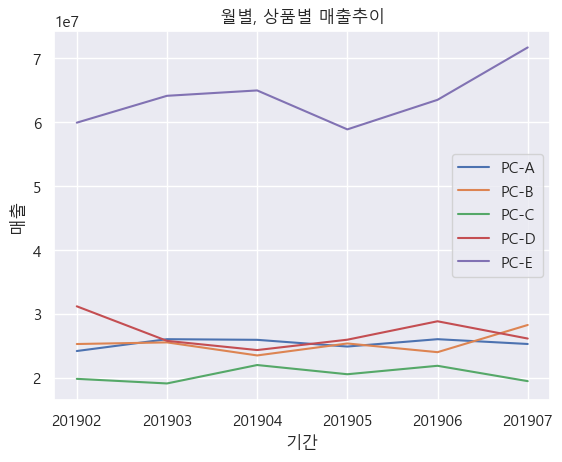

In [47]:
plt.plot(list(graph_data.index), graph_data['PC-A'], label='PC-A')
plt.plot(list(graph_data.index), graph_data['PC-B'], label='PC-B')
plt.plot(list(graph_data.index), graph_data['PC-C'], label='PC-C')
plt.plot(list(graph_data.index), graph_data['PC-D'], label='PC-D')
plt.plot(list(graph_data.index), graph_data['PC-E'], label='PC-E')
plt.legend()
plt.title('월별, 상품별 매출추이')
plt.xlabel('기간')
plt.ylabel('매출')

plt.show()